In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point


In [70]:
pd.set_option('display.max_columns', None)


In [25]:
# Cargar los datos
file_path = 'reporte_de_estratificacion_y_cobertura.csv'
data = pd.read_csv(file_path)

# Eliminar columnas irrelevantes o sin nombre, si existen
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

# Convertir la columna 'periodo' a formato datetime para facilitar el agrupamiento
data['periodo'] = pd.to_datetime(data['periodo'], format='%d/%m/%Y')

# Agrupar por 'periodo', 'comuna' y 'servicio' y calcular el promedio de 'suscriptores'
avg_data = data.groupby(['periodo', 'comuna', 'servicio'], as_index=False)['suscriptores'].mean()

# Mostrar el resultado

avg_data = data.rename(columns={'comuna': 'codigo'})


avg_data.to_csv('Servicios_Comuna')

In [ ]:
# IDH 2014 - 2023
ruta_csv = "Objetivo 1\indice_desarrollo_humano.csv"

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    IDH = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    # Mostrar las primeras filas para verificar la carga correcta de los datos
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
IDH = IDH.iloc[:, 2:14]
IDH.to_csv("IDH",sep=',')
IDH

,codigo,nombre,i_2014,i_2015,i_2016,i_2017,i_2018,i_2019,i_2020,i_2021,i_2022,i_2023
0,1,Popular,0.57,0.64,0.58,0.58,0.58,0.57,0.56,0.61,NaN,NaN
1,2,Santa Cruz,0.58,0.65,0.60,0.60,0.60,0.62,0.57,0.64,NaN,NaN
2,3,Manrique,0.61,0.68,0.61,0.62,0.62,0.62,0.57,0.64,NaN,NaN
3,4,Aranjuez,0.65,0.70,0.64,0.66,0.68,0.70,0.67,0.68,NaN,NaN
4,5,Castilla,0.67,0.72,0.69,0.66,0.73,0.75,0.61,0.70,NaN,NaN
5,6,Doce de Octubre,0.62,0.70,0.63,0.64,0.67,0.68,0.60,0.67,NaN,NaN
6,7,Robledo,0.66,0.70,0.67,0.67,0.68,0.68,0.61,0.70,NaN,NaN
7,8,Villa Hermosa,0.63,0.69,0.62,0.64,0.62,0.62,0.59,0.65,NaN,NaN
8,9,Buenos Aires,0.68,0.74,0.69,0.68,0.68,0.67,0.60,0.70,NaN,NaN
9,10,La Candelaria,0.75,0.76,0.74,0.73,0.76,0.78,0.63,0.73,NaN,NaN


In [43]:
#IPM 2014 - 2023

ruta_csv = "Objetivo 1\indice_pobreza_multidimen.csv"

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    IPM = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    # Mostrar las primeras filas para verificar la carga correcta de los datos
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
IPM = IPM.drop(columns=['i_2020'])

IPM = IPM.iloc[:, 2:14]
IPM.to_csv('IPM',sep=",")


IPM

,codigo,nombre,i_2014,i_2015,i_2016,i_2017,i_2018,i_2019,i_2021,i_2022,i_2023,Shape_Length
0,1,Popular,31.55,14.19,23.46,27.74,24.77,22.41,25.24,17.91,27.68,9604.448562
1,2,Santa Cruz,23.34,17.92,23.05,25.11,22.44,16.66,21.63,11.24,24.37,8597.294374
2,3,Manrique,18.86,20.84,17.95,24.63,23.07,17.84,16.23,12.85,23.41,12077.559132
3,4,Aranjuez,17.20,16.16,15.86,19.65,13.52,13.94,11.34,9.15,13.30,9642.676543
4,5,Castilla,9.47,9.72,4.90,11.32,10.95,7.54,5.78,5.10,12.45,16098.032108
5,6,Doce de Octubre,16.70,18.46,10.95,14.40,16.60,13.28,13.57,14.62,10.01,10709.846407
6,7,Robledo,11.97,14.67,10.07,14.58,13.24,8.93,10.75,10.58,10.32,23265.233431
7,8,Villa Hermosa,17.71,16.40,21.92,20.28,15.71,17.48,16.29,13.36,15.54,16392.858845
8,9,Buenos Aires,11.97,8.96,9.78,11.92,4.37,9.40,8.52,10.09,7.35,18364.902995
9,10,La Candelaria,6.26,8.10,7.54,11.51,8.40,9.83,11.11,7.74,5.55,13632.701395


In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Definir la ruta del archivo CSV
ruta_csv = "Objetivo 1/indice_pobreza_multidimen.csv"  # Usar '/' o raw strings para evitar problemas con '\'

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    IPM = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    print("Archivo CSV cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Verificar las columnas cargadas
print("\nColumnas originales del DataFrame:")
print(IPM.columns)

# Eliminar la columna 'i_2020' si existe
if 'i_2020' in IPM.columns:
    IPM = IPM.drop(columns=['i_2020'])
    print("\nColumna 'i_2020' eliminada.")
else:
    print("\nLa columna 'i_2020' no existe en el DataFrame.")

# Seleccionar las columnas relevantes (de la 2 a la 13, 0-based indexing)
IPM = IPM.iloc[:, 2:14]
print("\nColumnas seleccionadas para normalizar:")
print(IPM.columns)

# Guardar el DataFrame filtrado en un nuevo archivo CSV (opcional)
IPM.to_csv('IPM_filtrado.csv', sep=",", index=False)
print("\nDataFrame filtrado guardado en 'IPM_filtrado.csv'.")

# Definir las columnas que deseas normalizar
columnas_a_normalizar = ['i_2014', 'i_2015', 'i_2016', 'i_2017', 
                          'i_2018', 'i_2019', 'i_2021', 'i_2022', 'i_2023']

# Verificar que todas las columnas existen en el DataFrame
columnas_existentes = [col for col in columnas_a_normalizar if col in IPM.columns]
faltantes = set(columnas_a_normalizar) - set(columnas_existentes)

if faltantes:
    print(f"\nAdvertencia: Las siguientes columnas no se encuentran en el DataFrame: {faltantes}")
else:
    print("\nTodas las columnas a normalizar están presentes en el DataFrame.")

# Inicializar el escalador
scaler = MinMaxScaler()

# Seleccionar los datos a normalizar
datos_a_normalizar = IPM[columnas_existentes]

# Aplicar la normalización
datos_normalizados = scaler.fit_transform(datos_a_normalizar)

# Crear un DataFrame con los datos normalizados
df_normalizado = pd.DataFrame(datos_normalizados, columns=columnas_existentes)

print("\nDatos normalizados:")
print(df_normalizado.head())

# Reemplazar las columnas originales con las normalizadas
IPM_normalizado = IPM.copy()
IPM_normalizado[columnas_existentes] = df_normalizado

print("\nDataFrame con datos normalizados:")
print(IPM_normalizado.head())

# Guardar el DataFrame normalizado en un nuevo archivo CSV (opcional)
IPM_normalizado.to_csv('IPM_normalizado.csv', sep=",", index=False)
print("\nDataFrame normalizado guardado en 'IPM_normalizado.csv'.")


Archivo CSV cargado exitosamente.

Columnas originales del DataFrame:
Index(['OBJECTID', 'Shape', 'codigo', 'nombre', 'i_2014', 'i_2015', 'i_2016',
       'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022', 'i_2023',
       'Shape_Length', 'Shape_Area'],
      dtype='object')

Columna 'i_2020' eliminada.

Columnas seleccionadas para normalizar:
Index(['codigo', 'nombre', 'i_2014', 'i_2015', 'i_2016', 'i_2017', 'i_2018',
       'i_2019', 'i_2021', 'i_2022', 'i_2023', 'Shape_Length'],
      dtype='object')

DataFrame filtrado guardado en 'IPM_filtrado.csv'.

Todas las columnas a normalizar están presentes en el DataFrame.

Datos normalizados:
     i_2014    i_2015    i_2016    i_2017    i_2018    i_2019    i_2021  \
0  0.989583  0.336338  0.918896  1.000000  1.000000  0.978251  1.000000   
1  0.722331  0.432398  0.901756  0.902303  0.899482  0.723036  0.837899   
2  0.576497  0.507597  0.688545  0.884473  0.926661  0.775411  0.595420   
3  0.522461  0.387072  0.601171  0.699480  

In [42]:
#IIA 2014-2023
ruta_csv = "Objetivo 2\csv_inseguridad_alimentaria\inseguridad_alimentaria.csv"

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    IIA = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    # Mostrar las primeras filas para verificar la carga correcta de los datos
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
IIA = IIA.iloc[:, 2:14]
IIA = IIA.drop(columns=['total_2020'])

IIA.to_csv("IIA",sep=',')
IIA

,codigo,nombre,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2021,total_2022,total_2023
0,1,Popular,68.26,46.63,58.47,65.27,59.62,61.64,80.76,74.90,68.72
1,2,Santa Cruz,69.97,44.90,64.51,64.21,52.71,53.94,82.20,74.28,65.97
2,3,Manrique,58.29,48.60,60.94,62.06,60.55,58.44,76.03,70.07,68.56
3,4,Aranjuez,57.75,42.73,53.48,49.05,52.60,48.92,72.30,65.97,60.21
4,5,Castilla,50.62,30.23,51.44,44.77,45.48,41.45,58.33,65.57,58.86
5,6,Doce de Octubre,56.86,49.89,51.88,50.74,55.15,48.41,61.69,66.95,63.74
6,7,Robledo,55.12,39.83,47.45,41.94,46.86,39.19,60.62,60.96,56.74
7,8,Villa Hermosa,63.89,47.14,57.41,51.35,51.00,51.64,80.03,68.43,61.40
8,9,Buenos Aires,43.86,36.45,44.05,39.02,38.30,41.16,63.67,57.94,56.85
9,10,La Candelaria,36.86,33.68,34.54,33.64,36.43,42.67,57.73,49.86,40.67


In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt

# Paso 1: Definir la ruta del archivo CSV
ruta_csv = "Objetivo 2/csv_inseguridad_alimentaria/inseguridad_alimentaria.csv"  # Usar '/' para evitar problemas con '\'

# Paso 2: Cargar el archivo CSV con manejo de excepciones
try:
    # Cargar el archivo CSV con codificación ISO-8859-1
    IIA = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    print("Archivo CSV cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    raise

# Paso 3: Mostrar las primeras filas para verificar la carga correcta
print("\nPrimeras filas del DataFrame cargado:")
print(IIA.head())

# Paso 4: Seleccionar solo las columnas relevantes (manteniendo 'codigo' y 'nombre')
# En este caso, las columnas 'codigo' y 'nombre' no deben eliminarse, y seleccionamos las columnas de los años.
IIA = IIA[['codigo', 'nombre', 'total_2014', 'total_2015', 'total_2016', 'total_2017', 
           'total_2018', 'total_2019', 'total_2021', 'total_2022', 'total_2023']]

# Paso 5: Verificar las columnas seleccionadas para normalizar
print("\nColumnas seleccionadas para normalizar:")
print(IIA.columns.tolist())

# Paso 6: Guardar el DataFrame filtrado (opcional)
ruta_filtrado = 'IIA_filtrado.csv'
IIA.to_csv(ruta_filtrado, sep=",", index=False)
print(f"\nDataFrame filtrado guardado en '{ruta_filtrado}'.")

# Paso 7: Definir las columnas a normalizar
columnas_a_normalizar = ['total_2014', 'total_2015', 'total_2016', 'total_2017',
                          'total_2018', 'total_2019', 'total_2021', 'total_2022', 'total_2023']

# Paso 8: Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Paso 9: Seleccionar los datos a normalizar
datos_a_normalizar = IIA[columnas_a_normalizar]

# Paso 10: Manejar valores faltantes si existen
print("\nValores faltantes por columna antes de la normalización:")
print(datos_a_normalizar.isnull().sum())

# Opcional: Rellenar valores faltantes con la media de cada columna
datos_a_normalizar = datos_a_normalizar.fillna(datos_a_normalizar.mean())
print("\nValores faltantes después de rellenar con la media:")
print(datos_a_normalizar.isnull().sum())

# Paso 11: Aplicar la normalización
datos_normalizados = scaler.fit_transform(datos_a_normalizar)

# Paso 12: Crear un DataFrame con los datos normalizados
df_normalizado = pd.DataFrame(datos_normalizados, columns=columnas_a_normalizar)

# Paso 13: Concatenar con las columnas no normalizadas (codigo, nombre)
IIA_normalizado = pd.concat([IIA[['codigo', 'nombre']], df_normalizado], axis=1)

# Paso 14: Verificar los datos normalizados
print("\nDatos normalizados (primeras 5 filas):")
print(IIA_normalizado.head())

# Paso 15: Guardar el DataFrame normalizado en un nuevo archivo CSV
ruta_normalizado = 'IIA_normalizado.csv'
IIA_normalizado.to_csv(ruta_normalizado, sep=",", index=False)
print(f"\nDataFrame normalizado guardado en '{ruta_normalizado}'.")
# Calcular la media de cada año para visualizar la tendencia general
media_por_año = IIA_normalizado[columnas_a_normalizar].mean()


print("Gráfico de tendencia guardado como 'tendencia_IIA_normalizado.png'.")


Archivo CSV cargado exitosamente.

Primeras filas del DataFrame cargado:
   OBJECTID                                    Shape  codigo      nombre  \
0         1   (4718611.922461629, 2254112.982707406)       1     Popular   
1         2  (4717471.901360827, 2254648.3111255593)       2  Santa Cruz   
2         3  (4718479.607630689, 2251852.4937053234)       3    Manrique   
3         4  (4716680.291627194, 2252195.0294205956)       4    Aranjuez   
4         5  (4715903.412076725, 2253981.9996353034)       5    Castilla   

   total_2014  total_2015  total_2016  total_2017  total_2018  total_2019  \
0       68.26       46.63       58.47       65.27       59.62       61.64   
1       69.97       44.90       64.51       64.21       52.71       53.94   
2       58.29       48.60       60.94       62.06       60.55       58.44   
3       57.75       42.73       53.48       49.05       52.60       48.92   
4       50.62       30.23       51.44       44.77       45.48       41.45   

   ... 

In [2]:
#ISDCE 2015 - 2018
ruta_csv = "Objetivo 4\ISDCE\indice_sintetico_de_calidad_educativa 2015-2018.csv"

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    ISDCE = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    # Mostrar las primeras filas para verificar la carga correcta de los datos
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")


ISDCE

,codigo_dane,establecimiento educativo,comuna,prestacion_servicio,isce_total_2018,isce_prim_2018,isce_secun_2018,isce_media_2018,desempeÃ±o_prim_2018,progreso_prim_2018,...,progreso_prim_2015,eficiencia_prim_2015,ambiente_prim_2015,desempeÃ±o_secun_2015,progreso_secun_2015,eficiencia_secun_2015,ambiente_secun_2015,desempeÃ±o_media_2015,progreso_media_2015,eficiencia_media_2015
0,105001000001,inst educ jose maria velaz,2.0,oficial,5.013075,4.878913,5.357148,4.712811,2.310,0.980493,...,0.007762,0.810345,0.740938,2.600,0.000000,0.677108,0.735267,2.328490,3.109375,1.324675
1,105001000043,inst educ barrio santa cruz,2.0,oficial,4.119230,4.045129,3.718668,4.986942,2.146,0.309066,...,0.174481,0.784588,0.715645,2.072,1.500000,0.731183,0.756312,2.228525,0.000000,1.254545
2,105001000132,inst educ jose maria bernal,16.0,oficial,6.726418,5.907455,7.286839,7.588348,2.496,1.695106,...,1.510135,0.873508,0.736376,2.512,0.005435,0.605119,0.725855,2.437987,3.000000,1.754386
3,105001000141,inst educ camilo torres restrepo,4.0,oficial,6.312616,7.095211,5.500043,5.973781,2.468,3.000000,...,0.957249,0.801394,0.740243,2.092,0.030000,0.709497,0.747618,2.279902,2.275362,1.753425
4,105001000167,col la pastora-en administracion (ac),1.0,contratacion,NaN,6.183887,NaN,5.691073,2.510,2.041090,...,1.120511,0.830479,0.716135,2.212,0.433622,0.751958,0.753290,2.211089,0.000000,1.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,305001026343,colegio luis amigo y ferrer,7.0,contratacion,5.025826,5.450224,4.809918,4.448771,2.254,1.465100,...,0.750000,NaN,NaN,3.176,3.000000,NaN,NaN,NaN,NaN,NaN
389,405001013912,esc popular eucaristica santa angela,60.0,contratacion,NaN,5.486312,NaN,NaN,2.328,1.562500,...,0.589787,0.884058,0.750998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,405001016946,col coop san antonio de prado (ac),80.0,contratacion,6.807100,5.663506,7.699994,7.817622,2.584,1.338154,...,1.500000,0.911519,NaN,2.860,3.021505,0.804569,0.757919,2.731373,3.000000,1.931973
391,405001018213,colegio cedepro,8.0,contratacion,3.188688,3.000000,1.500000,6.568438,NaN,3.000000,...,2.018790,0.753247,0.720816,2.012,0.910714,0.414169,0.714847,2.234802,0.132898,0.484848


In [ ]:
#IZV

ruta_csv = "Objetivo 11\csv_inventario_zonas_verdes\inventario_zonas_verdes.csv"

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    IZV = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    # Mostrar las primeras filas para verificar la carga correcta de los datos
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

IZV


In [ ]:
ruta_csv = "Objetivo 11\csv_pot48_2014_espacio_public 2014\pot48_2014_espacio_public.csv"

try:
    # Intentar cargar el archivo CSV con una codificación diferente (ISO-8859-1)
    EP = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    # Mostrar las primeras filas para verificar la carga correcta de los datos
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

EP


In [ ]:
#IMVT 2007 - 2017

import pandas as pd

# Ruta del archivo CSV
ruta_csv = "Llegadas\ingreso_mensual_de_vehiculos_a_terminales_de_medellin.csv"

try:
    # Cargar el archivo CSV con la codificación especificada
    IMVT = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    
    # Asegurarse de que 'ing_periodo' tenga solo el año (primeros 4 dígitos)
    IMVT['ing_periodo'] = IMVT['ing_periodo'].astype(str).str[:4]
    
    # Calcular el promedio de 'ing_valor' por 'ing_periodo'
    promedio_por_periodo = IMVT.groupby('ing_periodo')['ing_valor'].mean().reset_index()

    # Mostrar el resultado del promedio por 'ing_periodo'
    print(promedio_por_periodo)

except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

promedio_por_periodo.to_csv('Ingreso_mensual_vehiculos prom', index=False)


In [4]:
ruta_csv_medellin = 'Llegadas\llegadas_medellin.csv'

# Cargar el archivo CSV con la codificación especificada
llegadas_totales = pd.read_csv(ruta_csv_medellin, encoding='ISO-8859-1')
llegadas_totales = llegadas_totales.iloc[7:,:]
llegadas_totales.to_csv("llegadas_totales",sep=",")
llegadas_totales['total_llegadas'] = llegadas_totales['llegada_nac'] + llegadas_totales['llegada_inter']


llegadas_totales = llegadas_totales[llegadas_totales['year'] != 2020]

print(llegadas_totales)


    year  terminal  llegada_nac  llegada_inter  total_llegadas
7   2014  739249.0      3006082         593717         3599799
8   2015  778860.0      3180807         675417         3856224
9   2016  783338.0      3431924         773123         4205047
10  2017  811556.0      3400662         781905         4182567
11  2018       0.0      3561193         883822         4445015
12  2019       0.0      4047701         973807         5021508
14  2021       0.0      3540661         765563         4306224
15  2022       0.0      5265287        1307401         6572688
16  2023       0.0       832759         224222         1056981


# Correlaciones

In [ ]:
import pandas as pd


# Convertir la columna 'total_llegadas' en una Serie de pandas, con el índice de los años disponibles
llegadas = pd.Series(llegadas_totales['total_llegadas'].values, index=llegadas_totales['year'])

# Columnas de IPM correspondientes a los años disponibles (sin 2020)
columnas_anuales = ['i_2014', 'i_2015', 'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2021', 'i_2022', 'i_2023']

# Crear una lista para almacenar las correlaciones
correlaciones = []

for index, row in IPM.iterrows():
    # Extraer los valores de 'i_2014' a 'i_2023' en la fila actual y asignar el índice de los años
    valores_anuales = pd.Series(row[columnas_anuales].values, index=[2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])
    
    # Convertir valores_anuales a float para asegurar que sean numéricos
    valores_anuales = valores_anuales.astype(float).dropna()
    llegadas_alineadas = llegadas[valores_anuales.index].dropna()
    
    # Calcular la correlación si las series tienen la misma longitud
    if len(valores_anuales) == len(llegadas_alineadas):
        corr_IPM_llt = valores_anuales.corr(llegadas_alineadas)
    else:
        corr_IPM_llt = None  # Si no tienen la misma longitud, establecer la correlación como None
    
    correlaciones.append(corr_IPM_llt)
    print(f"Correlación en fila {index}: {corr_IPM_llt}")

# Agregar las correlaciones como una nueva columna en el DataFrame IPM
IPM['correlacion_llegadas'] = correlaciones


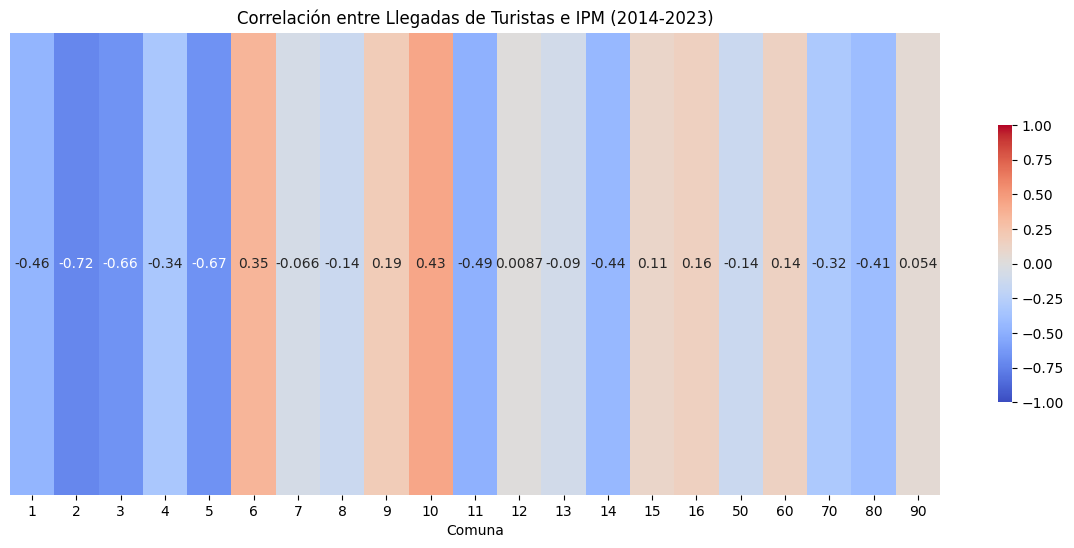

ValueError: Format 'csv' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

<Figure size 640x480 with 0 Axes>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Valores de correlación proporcionados
correlacion_datos = {
    'Correlación': [
        -0.4639749640670134, -0.7192162781780861, -0.6586472647634389, -0.33588812410187047,
        -0.6684506719640514, 0.3483195494385613, -0.06604185286656859, -0.1405612972765818,
        0.19233894590818645, 0.4349024769535484, -0.4903422925698017, 0.008697758863040621,
        -0.09013597450001973, -0.4382224825320218, 0.1074244938722949, 0.15520214285925774,
        -0.13999559131300696, 0.14095665559279516, -0.3173584956714612, -0.41106794837830213,
        0.05385001730943829
    ]
}

# Códigos correspondientes a cada fila
codigos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 50, 60, 70, 80, 90]

# Crear un DataFrame con las correlaciones y los códigos
correlacion_df = pd.DataFrame(correlacion_datos)
correlacion_df['Código'] = codigos
correlacion_df.set_index('Código', inplace=True)

# Crear el heatmap de correlación con los códigos en el eje X
plt.figure(figsize=(15, 6))
sns.heatmap(correlacion_df.T, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"shrink": 0.6})
plt.title("Correlación entre Llegadas de Turistas e IPM (2014-2023)")
plt.xlabel("Comuna")
plt.yticks([], [])  # Oculta el eje Y
plt.show()

plt.savefig(file_path)




In [37]:
import pandas as pd

# Seleccionar solo las columnas de los años relevantes y omitir la columna total_2020
columnas_anuales_IIA = ['total_2014', 'total_2015', 'total_2016', 'total_2017', 
                        'total_2018', 'total_2019', 'total_2021', 'total_2022', 'total_2023']
IIA = IIA[columnas_anuales_IIA]

# Crear una serie con los valores de 'total_llegadas', con el índice en años disponibles
llegadas = pd.Series(llegadas_totales['total_llegadas'].values, index=llegadas_totales['year'])

# Crear una lista para almacenar las correlaciones
correlaciones_IIA = []

# Iterar sobre cada fila de IIA para calcular la correlación
for index, row in IIA.iterrows():
    # Extraer los valores anuales de cada fila y alinear el índice con los años
    valores_anuales_IIA = pd.Series(row[columnas_anuales_IIA].values, index=[2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])
    
    # Asegurar que los valores sean numéricos y eliminar valores nulos
    valores_anuales_IIA = valores_anuales_IIA.astype(float).dropna()
    llegadas_alineadas = llegadas[valores_anuales_IIA.index].dropna()
    
    # Calcular la correlación si las series tienen la misma longitud
    if len(valores_anuales_IIA) == len(llegadas_alineadas):
        corr_IIA_llegadas = valores_anuales_IIA.corr(llegadas_alineadas)
    else:
        corr_IIA_llegadas = None  # Si no tienen la misma longitud, establecer como None
    
    correlaciones_IIA.append(corr_IIA_llegadas)
    print(f"Correlación en fila {index}: {corr_IIA_llegadas}")

# Agregar las correlaciones como una nueva columna en el DataFrame IIA
IIA['correlacion_llegadas'] = correlaciones_IIA


NameError: name 'IIA' is not defined

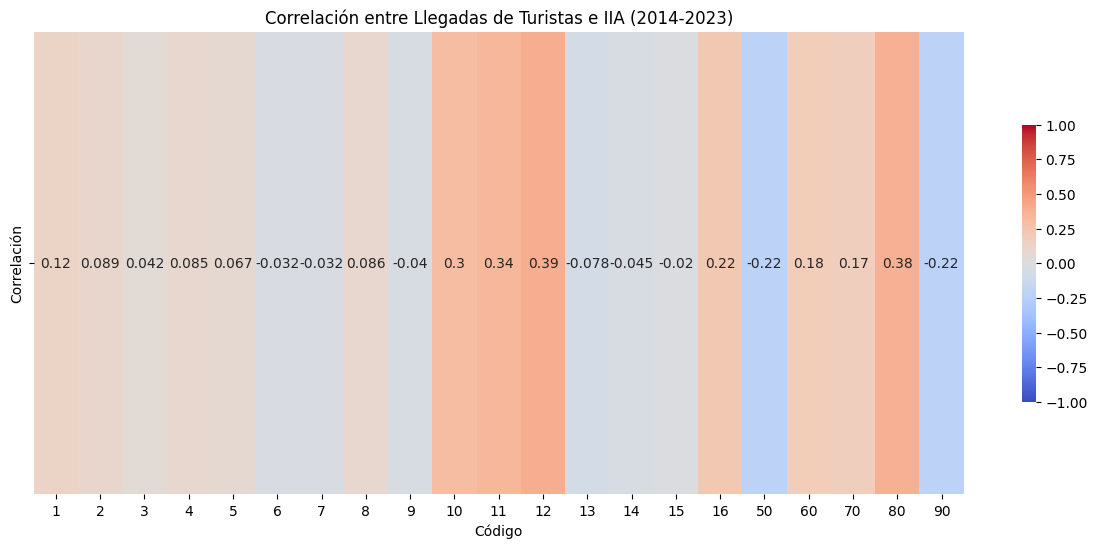

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nuevos valores de correlación
correlacion_datos = {
    'Correlación': [
        0.11891924828280052, 0.0889182040498139, 0.04231108104739252, 0.08517885907033393,
        0.06653466914530333, -0.03189944609730216, -0.032105458737538554, 0.08581116871637091,
        -0.04010884967982079, 0.30325458612471407, 0.3435622185705392, 0.39385800444229474,
        -0.07800230999231338, -0.04498946376266966, -0.01961236445158742, 0.22305744973118494,
        -0.22208160354573114, 0.18133026128203814, 0.16661042014263341, 0.380047354486077,
        -0.22146163136921349
    ]
}

# Códigos correspondientes a cada fila
codigos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 50, 60, 70, 80, 90]

# Crear un DataFrame con las correlaciones y los códigos
correlacion_df = pd.DataFrame(correlacion_datos)
correlacion_df['Código'] = codigos
correlacion_df.set_index('Código', inplace=True)

# Crear el heatmap de correlación con los códigos en el eje X
plt.figure(figsize=(15, 6))
sns.heatmap(correlacion_df.T, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"shrink": 0.6})
plt.title("Correlación entre Llegadas de Turistas e IIA (2014-2023)")
plt.xlabel("Comuna")
# plt.yticks([], [])  # Oculta el eje Y
plt.show()


   year  total_llegadas
0  2015         3856224
1  2016         4205047
2  2017         4182567
3  2018         4445015
    comuna  isce_total_2018  iscec_total_2017  iscec_total_2016  \
0      1.0         4.983416          5.001186          4.792681   
1      2.0         4.909961          5.051010          4.538902   
2      3.0         5.075515          4.910590          4.914544   
3      4.0         5.628077          5.543903          5.469865   
4      5.0         5.690972          5.634499          5.416038   
5      6.0         5.098998          4.989156          4.906453   
6      7.0         5.563508          5.672795          5.522091   
7      8.0         4.605207          4.959830          4.256078   
8      9.0         5.850118          5.906716          5.632105   
9     10.0         6.058012          5.935993          5.845127   
10    11.0         7.386881          7.416647          7.618167   
11    12.0         6.189232          6.051372          6.096101   
12    13.

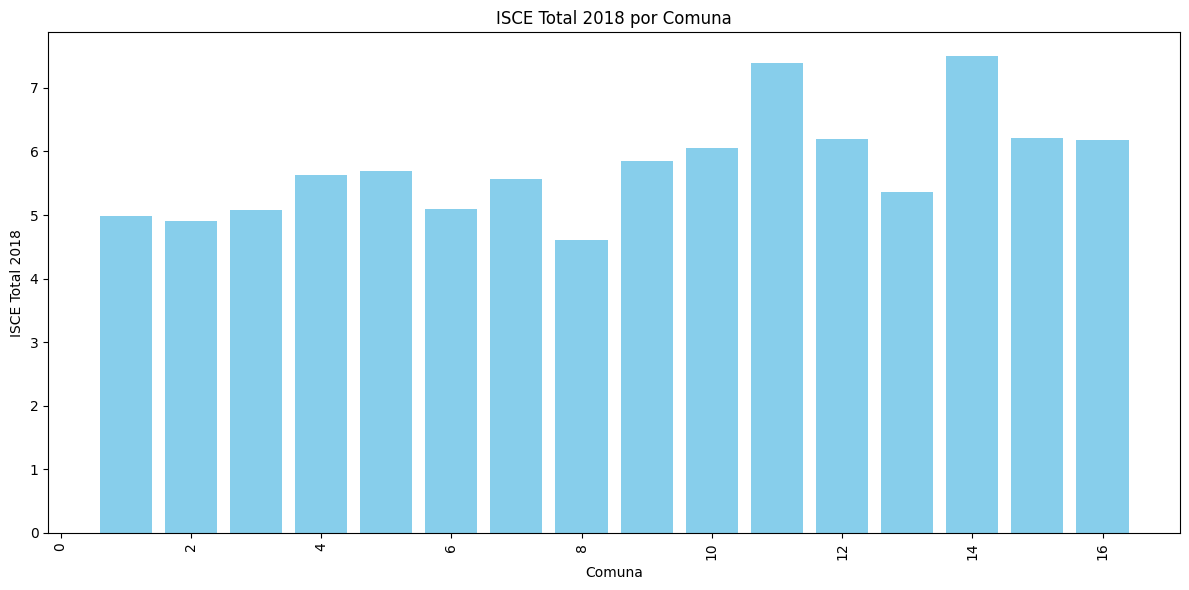

<Figure size 640x480 with 0 Axes>

In [22]:
llegadas_totales = llegadas_totales[llegadas_totales['year'].isin([2015, 2016, 2017, 2018])]
print(llegadas_totales)

# Cargar el archivo CSV proporcionado
file_path = "Objetivo 4\ISDCE\indice_sintetico_de_calidad_educativa 2015-2018.csv"

data = pd.read_csv(file_path)

# Ajustar los nombres de las columnas según los encontrados
isce_columns = ['isce_total_2018', 'iscec_total_2017', 'iscec_total_2016', 'iscec_total_2015', 'comuna']

# Seleccionar las columnas deseadas
data_filtered = data[isce_columns]

# Calcular el promedio de cada columna 'isce_total_201i' por comuna
average_by_comuna = data_filtered.groupby('comuna').mean()

average_by_comuna = pd.DataFrame(average_by_comuna)

average_by_comuna.to_csv("average_by_comuna")
average_by_comuna = average_by_comuna.reset_index()
average_by_comuna = average_by_comuna.iloc[0:16]
# Mostrar el resultado
print(average_by_comuna)

plt.figure(figsize=(12, 6))
plt.bar(average_by_comuna['comuna'], average_by_comuna['isce_total_2018'], color='skyblue')

# Personalizar el gráfico
plt.xlabel('Comuna')
plt.ylabel('ISCE Total 2018')
plt.title('ISCE Total 2018 por Comuna')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si hay muchas comunas
plt.tight_layout()       # Ajustar el gráfico para evitar recortes

# Mostrar el gráfico
plt.show()


plt.savefig('isce_total_2018_por_comuna_filas_0_a_16.png', dpi=300)


Datos antes de la normalización:
    comuna  isce_total_2018  iscec_total_2017  iscec_total_2016  \
0      1.0         4.983416          5.001186          4.792681   
1      2.0         4.909961          5.051010          4.538902   
2      3.0         5.075515          4.910590          4.914544   
3      4.0         5.628077          5.543903          5.469865   
4      5.0         5.690972          5.634499          5.416038   
5      6.0         5.098998          4.989156          4.906453   
6      7.0         5.563508          5.672795          5.522091   
7      8.0         4.605207          4.959830          4.256078   
8      9.0         5.850118          5.906716          5.632105   
9     10.0         6.058012          5.935993          5.845127   
10    11.0         7.386881          7.416647          7.618167   
11    12.0         6.189232          6.051372          6.096101   
12    13.0         5.356235          5.284466          4.978264   
13    14.0         7.497819 

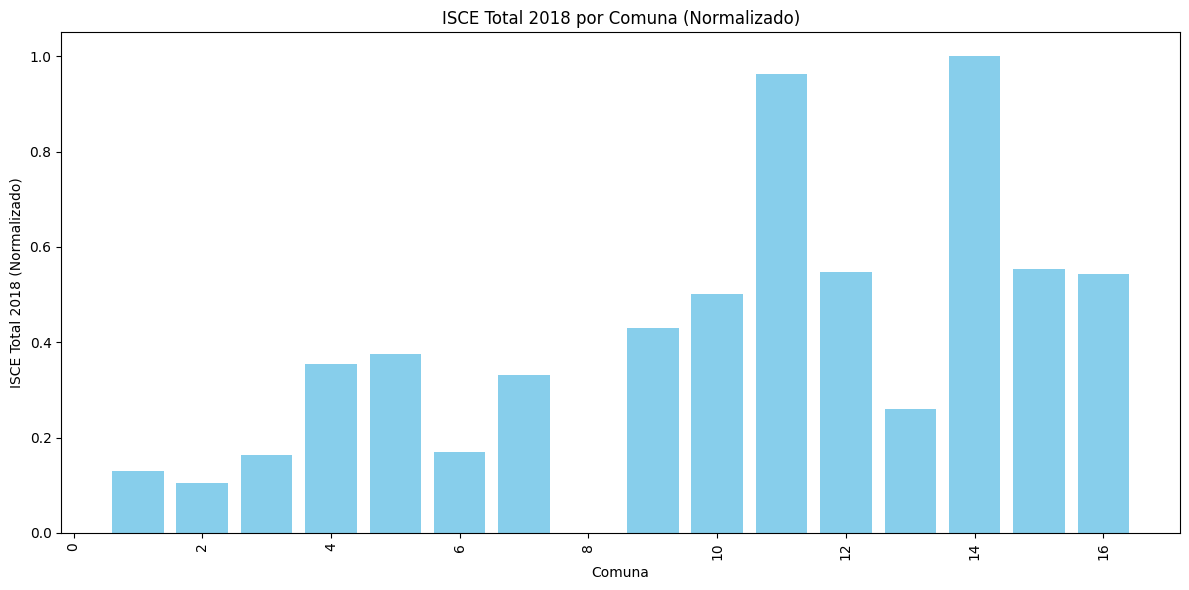

<Figure size 640x480 with 0 Axes>

In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "Objetivo 4/ISDCE/indice_sintetico_de_calidad_educativa 2015-2018.csv"
data = pd.read_csv(file_path)

# Ajustar los nombres de las columnas según los encontrados
isce_columns = ['isce_total_2018', 'iscec_total_2017', 'iscec_total_2016', 'iscec_total_2015', 'comuna']

# Seleccionar las columnas deseadas
data_filtered = data[isce_columns]

# Calcular el promedio de cada columna 'isce_total_201i' por comuna
average_by_comuna = data_filtered.groupby('comuna').mean()

# Convertir el DataFrame resultante a un DataFrame normal de pandas
average_by_comuna = pd.DataFrame(average_by_comuna)

# Resetear el índice para que 'comuna' sea una columna normal
average_by_comuna = average_by_comuna.reset_index()

# Seleccionar solo las primeras 16 filas como lo mencionaste
average_by_comuna = average_by_comuna.iloc[0:16]

# Ver el DataFrame resultante antes de la normalización
print("\nDatos antes de la normalización:")
print(average_by_comuna)

# Paso 1: Seleccionar las columnas que deseas normalizar
columns_to_normalize = ['isce_total_2018', 'iscec_total_2017', 'iscec_total_2016']

# Paso 2: Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Paso 3: Seleccionar los datos a normalizar
data_to_normalize = average_by_comuna[columns_to_normalize]

# Paso 4: Aplicar la normalización
normalized_data = scaler.fit_transform(data_to_normalize)

# Paso 5: Crear un DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Paso 6: Concatenar las columnas normalizadas con las columnas no normalizadas ('comuna')
average_by_comuna_normalized = pd.concat([average_by_comuna[['comuna']], normalized_df], axis=1)

# Ver el DataFrame después de la normalización
print("\nDatos normalizados:")
print(average_by_comuna_normalized)

# Paso 7: Guardar el DataFrame normalizado en un archivo CSV
average_by_comuna_normalized.to_csv("average_by_comuna_normalized.csv", index=False)

# Paso 8: Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(average_by_comuna_normalized['comuna'], average_by_comuna_normalized['isce_total_2018'], color='skyblue')

# Personalizar el gráfico
plt.xlabel('Comuna')
plt.ylabel('ISCE Total 2018 (Normalizado)')
plt.title('ISCE Total 2018 por Comuna (Normalizado)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si hay muchas comunas
plt.tight_layout()       # Ajustar el gráfico para evitar recortes

# Mostrar el gráfico
plt.show()

# Paso 9: Guardar el gráfico
plt.savefig('isce_total_2018_por_comuna_normalizado.png', dpi=300)


In [ ]:
import pandas as pd

# Load the new data for average_by_comuna
average_by_comuna = pd.read_csv('average_by_comuna')

# Define columns for analysis (only 2015-2018 as provided in llegadas_totales)
columnas_anuales_comuna = ['iscec_total_2015', 'iscec_total_2016', 'iscec_total_2017', 'isce_total_2018']

# Filter the average_by_comuna to include only relevant columns
average_by_comuna = average_by_comuna[columnas_anuales_comuna]

# Load the llegadas_totales DataFrame
llegadas_totales = pd.DataFrame({
    'year': [2015, 2016, 2017, 2018],
    'total_llegadas': [3856224, 4205047, 4182567, 4445015]
})

# Create a series with llegadas_totales values and use the 'year' column as index
llegadas = pd.Series(llegadas_totales['total_llegadas'].values, index=llegadas_totales['year'])

# Calculate correlation for each row in average_by_comuna with the llegadas series
correlaciones_comuna = []

for index, row in average_by_comuna.iterrows():
    # Extract and align values by year
    valores_anuales_comuna = pd.Series(row.values, index=[2015, 2016, 2017, 2018])
    
    # Ensure numerical conversion and drop NaNs
    valores_anuales_comuna = valores_anuales_comuna.astype(float).dropna()
    llegadas_alineadas = llegadas[valores_anuales_comuna.index].dropna()
    
    # Calculate correlation if both series have the same length
    if len(valores_anuales_comuna) == len(llegadas_alineadas):
        corr_comuna_llegadas = valores_anuales_comuna.corr(llegadas_alineadas)
    else:
        corr_comuna_llegadas = None  # Set to None if lengths don't match
    
    correlaciones_comuna.append(corr_comuna_llegadas)

# Add the correlation results as a new column in average_by_comuna
average_by_comuna['correlacion_llegadas'] = correlaciones_comuna

# Show the resulting DataFrame with correlations
average_by_comuna


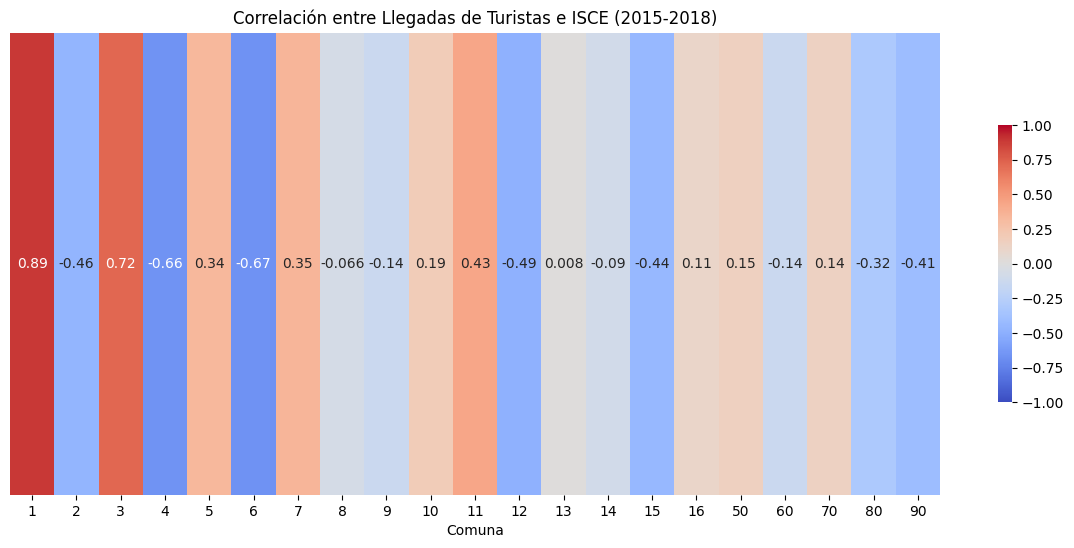

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nuevos valores de correlación proporcionados para el DataFrame average_by_comuna
correlacion_datos = {
    'Correlación': [
        0.889, -0.463, 0.719, -0.658, 0.335, -0.668, 0.348, -0.066,
        -0.14, 0.192, 0.434, -0.49, 0.008, -0.09, -0.438, 0.107,
        0.155, -0.139, 0.141, -0.317, -0.411
    ]
}

# Códigos correspondientes a cada fila
codigos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 50, 60, 70, 80, 90]

# Crear un DataFrame con las correlaciones y los códigos
correlacion_df = pd.DataFrame(correlacion_datos)
correlacion_df['Código'] = codigos
correlacion_df.set_index('Código', inplace=True)

# Crear el heatmap de correlación con los códigos en el eje X
plt.figure(figsize=(15, 6))
sns.heatmap(correlacion_df.T, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"shrink": 0.6})
plt.title("Correlación entre Llegadas de Turistas e ISCE (2015-2018)")
plt.xlabel("Comuna")
plt.yticks([])  # Oculta el eje Y para simplificar
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV
suscriptores = pd.read_csv("suscriptores_promedio_listo")

# Filtrar los datos para el periodo 2018 y servicio 'Acueducto'
data_2018 = suscriptores[(suscriptores['periodo'] == 2018) & (suscriptores['servicio'] == 'Aseo')]

# Seleccionar las columnas necesarias
data_2018 = data_2018[['periodo', "codigo", "servicio", "suscriptores"]]

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Normalizar los datos de suscriptores
data_2018['suscriptores_normalizados'] = scaler.fit_transform(data_2018[['suscriptores']])

# Mostrar el DataFrame con los datos normalizados
print(data_2018)

# Si deseas guardar los resultados en un archivo CSV
data_2018.to_csv('suscriptores_normalizados_2018_aseo.csv', index=False)



In [73]:
# Cargar los tres archivos CSV proporcionados
acueducto_df = pd.read_csv('suscriptores_normalizados_2018_acueducto.csv')
alcantarillado_df = pd.read_csv('suscriptores_normalizados_2018_alcantarillado.csv')
aseo_df = pd.read_csv('suscriptores_normalizados_2018_aseo.csv')

# Mostrar las primeras filas de cada archivo para verificar la carga
print("Acueducto DataFrame:")
print(acueducto_df.head())

print("\nAlcantarillado DataFrame:")
print(alcantarillado_df.head())

print("\nAseo DataFrame:")
print(aseo_df.head())

# Unir los tres DataFrames por la columna 'codigo'
merged_df = acueducto_df[['codigo', 'suscriptores', 'suscriptores_normalizados']].rename(columns={'suscriptores': 'suscriptores_acueducto', 'suscriptores_normalizados': 'suscriptores_normalizados_acueducto'})
merged_df = merged_df.merge(alcantarillado_df[['codigo', 'suscriptores', 'suscriptores_normalizados']].rename(columns={'suscriptores': 'suscriptores_alcantarillado', 'suscriptores_normalizados': 'suscriptores_normalizados_alcantarillado'}), on='codigo', how='outer')
merged_df = merged_df.merge(aseo_df[['codigo', 'suscriptores', 'suscriptores_normalizados']].rename(columns={'suscriptores': 'suscriptores_aseo', 'suscriptores_normalizados': 'suscriptores_normalizados_aseo'}), on='codigo', how='outer')

# Mostrar el DataFrame resultante
print(merged_df.head())

# Si deseas guardar los resultados en un archivo CSV
merged_df.to_csv('Servicios publicos normalizados 2018', index=False)


Acueducto DataFrame:
   periodo  codigo   servicio  suscriptores  suscriptores_normalizados
0     2018       1  Acueducto       6019.50                   0.473428
1     2018       2  Acueducto       4959.50                   0.388759
2     2018       3  Acueducto       6200.60                   0.487893
3     2018       4  Acueducto       7939.50                   0.626791
4     2018       5  Acueducto       7279.25                   0.574052

Alcantarillado DataFrame:
   periodo  codigo        servicio  suscriptores  suscriptores_normalizados
0     2018       1  Alcantarillado       5694.25                   0.451540
1     2018       2  Alcantarillado       4759.50                   0.376537
2     2018       3  Alcantarillado       6029.80                   0.478463
3     2018       4  Alcantarillado       7635.50                   0.607302
4     2018       5  Alcantarillado       7056.75                   0.560864

Aseo DataFrame:
   periodo  codigo servicio  suscriptores  suscriptor

In [75]:
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo shapefile
layer = gpd.read_file('porc_area_publica/porc_area_publica.shp')

# Verificar las columnas presentes en el shapefile
print(layer.columns)

# Seleccionar las columnas necesarias
ap = layer[['codigo', 'areas_publ']]

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Normalizar los valores de 'areas_publ'
ap['areas_publ_normalizados'] = scaler.fit_transform(ap[['areas_publ']])

# Mostrar el DataFrame con los valores normalizados
print(ap.head())

# Si deseas guardar los resultados en un archivo CSV
ap.to_csv('areas_publ_normalizados.csv', index=False)


Index(['codigo', 'nombre', 'identifica', 'limitemuni', 'subtipo_co',
       'fecha_actu', 'Shape_Leng', 'Shape_Area', 'area m2', 'cod_comuna',
       'porc_publi', 'areas_publ', 'geometry'],
      dtype='object')
  codigo  areas_publ  areas_publ_normalizados
0     01   129913.21                 0.070130
1     02    91871.51                 0.049174
2     03   139897.99                 0.075630
3     04   404399.41                 0.221337
4     05   685367.43                 0.376115


C:\Users\angel\AppData\Local\Temp\ipykernel_8824\1444255253.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap['areas_publ_normalizados'] = scaler.fit_transform(ap[['areas_publ']])


In [78]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV con los datos de salario
salario = pd.read_csv('salario_comuna (1).csv')

# Mostrar las primeras filas para verificar los datos cargados
print(salario.head())

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Normalizar la columna 'salario'
salario['salario_normalizado'] = scaler.fit_transform(salario[['salario']])

# Mostrar el DataFrame con la columna normalizada
print(salario[['comuna', 'salario', 'salario_normalizado']].head())

# Si deseas guardar el DataFrame actualizado con los datos normalizados en un archivo CSV
salario.to_csv('salario_normalizado.csv', index=False)


   comuna       salario
0     1.0  1.079046e+06
1     2.0  1.169325e+06
2     3.0  1.032675e+06
3     4.0  9.795760e+05
4     5.0  1.175325e+06
   comuna       salario  salario_normalizado
0     1.0  1.079046e+06             0.075100
1     2.0  1.169325e+06             0.122417
2     3.0  1.032675e+06             0.050796
3     4.0  9.795760e+05             0.022966
4     5.0  1.175325e+06             0.125561
